In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Parity plot
- Ref: Pega Devlog

## 함수화하여 사용하는 코드

In [15]:
def get_metrics(true, predict):
    mae = mean_absolute_error(true, predict)
    rmse = mean_squared_error(true, predict, squared=False)
    r2 = r2_score(true,predict)
    
    return mae, rmse, r2

def plot_parity(true, pred, kind="scatter", 
                xlabel="true", ylabel="predict", title="true vs predict", 
                hist2d_kws=None, scatter_kws=None, kde_kws=None,
                equal=True, metrics=True, metrics_position="lower right",
                figsize=(4, 4), ax=None, filename=None):
    
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)

    # data range
    val_min = min(true.min(), pred.min())
    val_max = max(true.max(), pred.max())

    # data plot
    if "scatter" in kind:
        if not scatter_kws:
            scatter_kws={'color':'green', 'alpha':0.5}
        ax.scatter(true, pred, **scatter_kws)
    elif "hist2d" in kind:
        if not hist2d_kws:
            hist2d_kws={'cmap':'Greens', 'vmin':1}
        ax.hist2d(true, pred, **hist2d_kws)
    elif "kde" in kind:
        if not kde_kws:
            kde_kws={'cmap':'viridis', 'levels':5}
        sns.kdeplot(x=true, y=pred, **kde_kws, ax=ax)

    # x, y bounds
    xbounds = ax.get_xbound()
    ybounds = ax.get_ybound()
    max_bounds = [min(xbounds[0], ybounds[0]), max(xbounds[1], ybounds[1])]
    ax.set_xlim(max_bounds)
    ax.set_ylim(max_bounds)

    # x, y ticks, ticklabels
    ticks = [int(y) for y in ax.get_yticks() if (10*y)%10 == 0]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks)

    # grid
    ax.grid(True)

    # 기준선
    ax.plot(max_bounds, max_bounds, c="k", alpha=0.3)

    # x, y label
    font_label = {"color":"black", "fontsize":"x-large"}
    ax.set_xlabel(xlabel, fontdict=font_label, labelpad=8)
    ax.set_ylabel(ylabel, fontdict=font_label, labelpad=8)

    # title
    font_title = {"color": "black", "fontsize":"x-large", "fontweight":"bold"}
    ax.set_title(title, fontdict=font_title, pad=16)

    # metrics
    if metrics:
        rmse = mean_squared_error(true, pred, squared=False)
        mae = mean_absolute_error(true, pred)
        r2 = r2_score(true, pred)

        font_metrics = {'color':'k', 'fontsize':12}

        if metrics_position == "lower right":
            text_pos_x = 0.98
            text_pos_y = 0.3
            ha = "right"
        elif metrics_position == "upper left":
            text_pos_x = 0.1
            text_pos_y = 0.9
            ha = "left"
        else:
            text_pos_x, text_pos_y = text_position
            ha = "left"

        ax.text(text_pos_x, text_pos_y, f"RMSE = {rmse:.3f}", 
                transform=ax.transAxes, fontdict=font_metrics, ha=ha)
        ax.text(text_pos_x, text_pos_y-0.1, f"MAE = {mae:.3f}", 
                transform=ax.transAxes, fontdict=font_metrics, ha=ha)
        ax.text(text_pos_x, text_pos_y-0.2, f"R2 = {r2:.3f}", 
                transform=ax.transAxes, fontdict=font_metrics, ha=ha)

    # 파일로 저장
    if not ax:
        fig.tight_layout()
        if filename:
            fig.savefig(filename)

    return ax

## 데이터활용 실습 

In [12]:
df = pd.read_csv('./RNN_data.csv',parse_dates = True)
df

,Unnamed: 0,load_actual,load_predict,price_actual,price_predict
0,0,19.529,19.866570,19.069208,18.633438
1,1,18.522,18.834867,18.556936,20.546097
2,2,18.408,18.253632,17.981175,20.032465
3,3,18.201,18.521260,17.651776,19.618000
4,4,18.511,18.652555,18.087304,19.568474
...,...,...,...,...,...
163,163,29.548,30.417990,51.513524,31.434048
164,164,28.601,29.016560,21.325683,45.198547
165,165,26.630,27.425049,20.133711,24.562962
166,166,24.631,24.775974,20.940139,20.116693


In [13]:
load_actual = df['load_actual']
load_predict = df['load_predict']
price_actual = df['price_actual']
price_predict = df['price_predict']

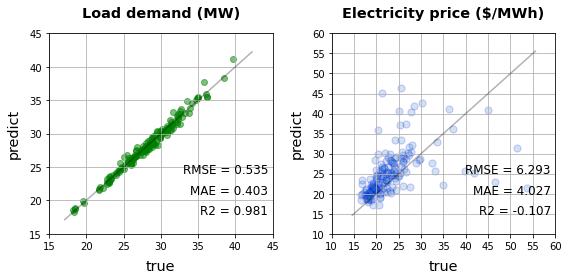

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=False)

# 왼쪽 axes
plot_parity(load_actual, load_predict, ax=axs[0], title="Load demand (MW)")

# 오른쪽 axes
plot_parity(price_actual, price_predict, ax=axs[1],
            scatter_kws={"s": 50, "ec": "b", "alpha": 0.2}, title="Electricity price ($/MWh)")

# 그림 저장
fig.tight_layout()
fig.savefig("73_mplfunc_09.png")

# 단계별 설명

## 예제 시작

In [ ]:
# 샘플 데이터 생성
size = 1_000
x = np.random.normal(size=size, loc = 12, scale = 2)
y = x + np.random.normal(size=size, loc = 0, scale =2)

In [ ]:
plt.scatter(x,y, alpha=0.3)

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

# data plot
ax.scatter(x, y, c="g", alpha=0.3)

# x, y limits
ax.set_xlim(0, 25)
ax.set_ylim(0, 25)

# x, y ticks, ticklabels
ticks = [0, 5, 10, 15, 20, 25]
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)

# grid
ax.grid(True)

# 기준선
ax.plot([0, 25], [0, 25], c="k", alpha=0.3)

# x, y label
font_label = {"color": "gray", "fontsize": "x-large"}
ax.set_xlabel("true", fontdict=font_label, labelpad=8)
ax.set_ylabel("predict", fontdict=font_label, labelpad=8)

# title
font_title = {"color": "gray", "fontsize": "x-large", "fontweight": "bold"}
ax.set_title("true vs predict", fontdict=font_title, pad=16)

# 파일로 저장
fig.tight_layout()
fig.savefig("73_mplfunc_01.png")

## 함수 만들기

In [ ]:
def plot_sample1(x, y, xlabel=None, ylabel=None, title=None, filename=None):
    # math fonts
    mathtext_fontset = plt.rcParams['mathtext.fontset']
    mathtext_default = plt.rcParams['mathtext.default']
    plt.rcParams['mathtext.fontset'] = "cm"
    plt.rcParams['mathtext.default'] = "it"

    # object oriented interface
    fig, ax = plt.subplots()

    # data plot
    ax.scatter(x, y)

    # x, y labels
    font_label = {"color": "gray", "fontsize": "x-large"}
    ax.set_xlabel(xlabel, fontdict=font_label, labelpad=8)
    ax.set_ylabel(ylabel, fontdict=font_label, labelpad=8)

    # title
    font_title = {"color": "darkgreen",
                  "fontsize": "xx-large", "fontweight": "bold"}
    ax.set_title(title, fontdict=font_title, pad=16)

    # math fonts restoration
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    plt.rcParams['mathtext.default'] = mathtext_default

    # save figure
    fig.tight_layout()
    if filename:
        fig.savefig(filename)

In [ ]:
x_sample = np.linspace(0, 10, 100)
y_sample = np.sin(x_sample)

plot_sample1(x_sample, y_sample, "$X$", "$Y$", "$Y = \mathrm{sin}(X)$")

## 시각화 유형 변환

In [ ]:
def plot_sample2(x, y, kind="scatter", xlabel=None, ylabel=None, title=None, filename=None):
    # math fonts
    mathtext_fontset = plt.rcParams['mathtext.fontset']
    mathtext_default = plt.rcParams['mathtext.default']
    plt.rcParams['mathtext.fontset'] = "cm"
    plt.rcParams['mathtext.default'] = "it"

    # object oriented interface
    fig, ax = plt.subplots()

    # data plot
    if "scatter" in kind:
        ax.scatter(x, y)
    elif "line" in kind:
        ax.plot(x,y)

    # x, y labels
    font_label = {"color": "gray", "fontsize": "x-large"}
    ax.set_xlabel(xlabel, fontdict=font_label, labelpad=8)
    ax.set_ylabel(ylabel, fontdict=font_label, labelpad=8)

    # title
    font_title = {"color": "darkgreen",
                  "fontsize": "xx-large", "fontweight": "bold"}
    ax.set_title(title, fontdict=font_title, pad=16)

    # math fonts restoration
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    plt.rcParams['mathtext.default'] = mathtext_default

    # save figure
    fig.tight_layout()
    if filename:
        fig.savefig(filename)

In [ ]:
plot_sample2(x_sample, y_sample, kind="line")

## Plot 유형에 따른 매개변수 입력

In [ ]:
def plot_sample3(x, y, kind="scatter", xlabel=None, ylabel=None, title=None,
                 filename=None, line_kws=None, scatter_kws=None):
    # math fonts
    mathtext_fontset = plt.rcParams['mathtext.fontset']
    mathtext_default = plt.rcParams['mathtext.default']
    plt.rcParams['mathtext.fontset'] = "cm"
    plt.rcParams['mathtext.default'] = "it"

    # object oriented interface
    fig, ax = plt.subplots()

    # data plot
    if "scatter" in kind:
            if not scatter_kws:
                scatter_kws={}
            ax.scatter(x, y, **scatter_kws)
    elif "line" in kind:
        if not line_kws:
                line_kws={}                
        ax.plot(x,y, **line_kws)

    # x, y labels
    font_label = {"color": "gray", "fontsize": "x-large"}
    ax.set_xlabel(xlabel, fontdict=font_label, labelpad=8)
    ax.set_ylabel(ylabel, fontdict=font_label, labelpad=8)

    # title
    font_title = {"color": "darkgreen",
                  "fontsize": "xx-large", "fontweight": "bold"}
    ax.set_title(title, fontdict=font_title, pad=16)

    # math fonts restoration
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    plt.rcParams['mathtext.default'] = mathtext_default

    # save figure
    fig.tight_layout()
    if filename:
        fig.savefig(filename)

In [ ]:
plot_sample3(x_sample, y_sample, kind="line",
             line_kws={"c":"r", "ls":":", "lw":3})
             # "c": "r"  - line color = "red"
             # "ls": ":" - line style = ......
             # "lw": 3   - line width = 3

In [ ]:
plot_sample3(x_sample, y_sample, kind="scatter",
             line_kws={"c": "r", "ls": ":", "lw": 3},
             scatter_kws={"s": 50, "ec": "b", "alpha": 0.2})
             # "s": 50       - marker size = 50
             # "ec": "b"     - marker color = "blue"
             # "alpha": 0.2  - marker 불투명도 = 0.2

## Axes as return

In [ ]:
def plot_sample4(x, y, kind="scatter", xlabel=None, ylabel=None, title=None,
                 filename=None, line_kws=None, scatter_kws=None):
    # math fonts
    mathtext_fontset = plt.rcParams['mathtext.fontset']
    mathtext_default = plt.rcParams['mathtext.default']
    plt.rcParams['mathtext.fontset'] = "cm"
    plt.rcParams['mathtext.default'] = "it"

    # object oriented interface
    fig, ax = plt.subplots()

    # data plot
    if "scatter" in kind:
            if not scatter_kws:
                scatter_kws={}
            ax.scatter(x, y, **scatter_kws)
    elif "line" in kind:
        if not line_kws:
                line_kws={}                
        ax.plot(x,y, **line_kws)

    # x, y labels
    font_label = {"color": "gray", "fontsize": "x-large"}
    ax.set_xlabel(xlabel, fontdict=font_label, labelpad=8)
    ax.set_ylabel(ylabel, fontdict=font_label, labelpad=8)

    # title
    font_title = {"color": "darkgreen",
                  "fontsize": "xx-large", "fontweight": "bold"}
    ax.set_title(title, fontdict=font_title, pad=16)

    # math fonts restoration
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    plt.rcParams['mathtext.default'] = mathtext_default

    # save figure
    fig.tight_layout()
    if filename:
        fig.savefig(filename)
        
    # return
    return ax
    

In [ ]:
ax = plot_sample4(x_sample, y_sample, kind="line", line_kws={"lw":3})

In [ ]:
# xlabel, ylabel, title 추가
ax.set_xlabel("xlabel (postprocess)")
ax.set_ylabel("ylabel (postprocess)")
ax.set_title("title (postprocess)")

# plot 추가
ax.plot(x_sample+1, y_sample)

# jupyter cell에서 시각화
display(ax.figure)

## Axes as input

- axes는 함수의 입력 매개변수로 작용할 때 그 진가를 발합니다.
    - 함수는 복잡한 명령을 한번에 실행한다는 장점이 있지만 유연성이 부족합니다.
    - 코딩은 유연성이 풍족하지만 일일이 코딩하기 번잡합니다.
    - 둘을 섞을 수 있는 방법이 axes를 input으로 받는 것입니다.
    - 머신러닝 예측결과 시각화로 예를 들어보겠습니다.

- parity plot은 실제값과 예측값을 비교하는 그림입니다.
    - trainset, validation set, testset 세 데이터 모두에 대해 그릴 수 있습니다.
    - 이 중 하나만 그릴 때도 있고 둘만, 셋 다 그릴 때가 있습니다.
    - 이 때마다 함수를 일일이 만든다면 몹시 번거로울 것입니다.
    - 이럴 때 이런 해법을 만들 수 있습니다.

- plt.subplots()등으로 필요한 수만큼 Axes을 만듭니다.
    - 준비된 함수로 각각의 Axes에 parity plot을 그립니다
    - 그러자면, 함수로 그려질 그림이 어디에 그려질지 지정되어야 합니다.
- 매개변수로 axes를 받으면 가능합니다.
- axes가 지정되지 않으면 스스로 figure를 만들도록 합니다. 이 때 figure size도 인자로 넣읍시다.
- 파일로 저장하려면 figure 객체가 필요합니다. figure 객체는 axes 입력이 없을 때만 존재하니 예외처리를 합니다.

In [ ]:
def plot_sample5(x, y, kind="scatter", xlabel=None, ylabel=None, title=None, 
                 filename=None, line_kws=None, scatter_kws=None, 
                 figsize=plt.rcParams['figure.figsize'], ax=None):
    # math fonts
    mathtext_fontset = plt.rcParams['mathtext.fontset']
    mathtext_default = plt.rcParams['mathtext.default']
    plt.rcParams['mathtext.fontset'] = "cm"
    plt.rcParams['mathtext.default'] = "it"
    
    # object oriented interface
    if not ax:
        fig, ax = plt.subplots(figsize=figsize)
    
    # data plot
    if "scatter" in kind:
        if not scatter_kws:
            scatter_kws={}
        ax.scatter(x, y, **scatter_kws)
    elif "line" in kind:
        if not line_kws:
            line_kws={}
        ax.plot(x, y, **line_kws)
    
    # x, y labels
    font_label = {"color":"gray", "fontsize":"x-large"}
    ax.set_xlabel(xlabel, fontdict=font_label, labelpad=8)
    ax.set_ylabel(ylabel, fontdict=font_label, labelpad=8)
    
    # title
    font_title = {"color": "darkgreen", "fontsize":"xx-large", "fontweight":"bold"}
    ax.set_title(title, fontdict=font_title, pad=16)
    
    # math fonts restoration
    plt.rcParams['mathtext.fontset'] = mathtext_fontset
    plt.rcParams['mathtext.default'] = mathtext_default
    
    # save figure
    if not ax:
        fig.tight_layout()
        if filename:
            fig.savefig(filename)
        
    # return
    return ax

In [ ]:
plot_sample5(x_sample, y_sample)

 - Subplot안에 넣기

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

font_title = {"fontweight":"bold", "fontsize":"x-large"}

# 왼쪽 axes
plot_sample5(x_sample, y_sample, ax=axs[0])
plot_sample5(10-x_sample, y_sample, ax=axs[0])
axs[0].set_title("plot 1", fontdict=font_title)

# 오른쪽 axes
plot_sample5(x_sample, -y_sample, kind="line", line_kws={"c": "r"}, ax=axs[1])
plot_sample5(x_sample, 1-y_sample, kind="line", line_kws={"c": "g"}, ax=axs[1])
axs[1].set_title("plot 1", fontdict=font_title)

# 그림 저장
fig.tight_layout()
fig.savefig("73_mplfunc_09.png")